# Other NumPy Features and Applications

v ekc

In [1]:
# Whenever you want to use numpy import it with the following code
import numpy as np

# Advanced indexing with masking

You can create a **mask** which is a boolean array. If you *apply* the mask to the array, it will return a mini array of the elements that are ```True```.

Another use could print the entire array with the ```False``` elements as say ```0``` and the ```True``` elements remain.

In [8]:
arr = np.arange(0,20,2)
arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [9]:
# select elements that are divisible by 3
arr[arr % 3 == 0]

array([ 0,  6, 12, 18])

### An example of creating the **mask** and applying it to the array: ```np.where(mask, arr, FalseValue)```

In [15]:
# another way to do that "masking"
mask = arr % 3 == 0

print(f'''mask:
{mask}
''')

arr2 = arr[mask]

print(f'''arr2[mask]:
{arr2}''')

mask:
[ True False False  True False False  True False False  True]

arr2[mask]:
[ 0  6 12 18]


#### An example of creaking a 2D ```arr[mask]```

Practice applying a boolean mask that will select values $< 9$

In [22]:
# also works with 2d arrays
arr2d = np.array([[1, 7, 9], 
                    [14, 19, 21], 
                    [25, 29, 35]])
arr2d

array([[ 1,  7,  9],
       [14, 19, 21],
       [25, 29, 35]])

In [26]:
# results 1d array
boolean_mask = arr2d > 9
result = arr2d[boolean_mask]

print(f'''arr2d[boolean_mask] =
{result}

After masking the 2D array, we get a 1D array''')

arr2d[boolean_mask] =
[14 19 21 25 29 35]

After masking the 2D array, we get a 1D array


As you can see, after applying the mask to even a 2D array, the result is a 1D array.

You may want this but more often than naught, you would like to preserve the 2D shape.
Use the function ```np.where(mask, arr, FalseValue)```

In [28]:
# to preserve the shape
result = np.where(boolean_mask, arr2d, 0)

print(f'''example with np.where() =
{result}
''')

example with np.where() =
[[ 0  0  0]
 [14 19 21]
 [25 29 35]]



### Checkin #1: consider the following array

How do we create a boolean mask for elements that are greater than 9?

In [130]:
arr = np.array([3, 5, 8, 10, 12, 15, 18])
print(arr)

[ 3  5  8 10 12 15 18]


#### Answer

In [131]:
arr = np.array([3, 5, 8, 10, 12, 15, 18])
mask = arr > 9


### Checkin #2: consider the following array

```[ 3  5  8 10 12 15 18]```

What does the mask return?

#### Answer

In [127]:
# an array of boolean values
mask

array([False, False, False,  True,  True,  True,  True])

### Checkin #3: now how to apply the mask?

We have 
- ```arr = np.array([3, 5, 8, 10, 12, 15, 18])```
- ```mask = arr > 9```

#### Answer

In [129]:
arr[mask]

array([10, 12, 15, 18])

### Checkin #4: apply the mask to a 2D array.

We have a $(3 \times 3)$ array. Apply a mask to select only the elements that are divisible by 4. Set all other elements to zero.

In [139]:
A = np.array([[2, 4, 6],
              [8, 10, 12],
              [14, 16, 18]])
A

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

#### Answer

In [138]:
mask = A % 4 == 0
np.where(mask, A, 0)

array([[ 0,  4,  0],
       [ 8,  0, 12],
       [ 0, 16,  0]])

## NumPy Methods

| NumPy Function        | Description                                           |
|----------------------|-------------------------------------------------------|
| `arr.max()`          | Returns the maximum value in the array                |
| `arr.min()`          | Returns the minimum value in the array                |
| `arr.argmax()`       | Returns the index of the maximum value                |
| `arr.argmin()`       | Returns the index of the minimum value                |
| `arr.argsort()`      | Returns indices that would sort the array             |
| `arr[arr.argsort()]` | Returns a sorted version of the array                 |
| `arr.mean()`         | Computes the mean (average) of the array               |
| `arr.std()`          | Computes the standard deviation of the array           |
| `arr.sum()`          | Returns the sum of all elements                        |
| `arr.cumsum()`       | Returns the cumulative sum of the elements             |


In [34]:
arr = np.array([5,2,7,3,1,8,3,1,7,2])
arr

array([5, 2, 7, 3, 1, 8, 3, 1, 7, 2])

In [35]:
# find the max
arr.max()

np.int64(8)

In [36]:
# find the min
arr.min()

np.int64(1)

In [37]:
# find the index of the maximum
arr.argmax()

np.int64(5)

In [38]:
# find the index of the maximum
arr.argmin()

np.int64(4)

#### Sorting!

In [39]:
# find the indices that would sort the array
arr.argsort()

array([4, 7, 1, 9, 3, 6, 0, 2, 8, 5])

In [40]:
arr[arr.argsort()]

array([1, 1, 2, 2, 3, 3, 5, 7, 7, 8])

#### Statistics

In [41]:
# find the mean
arr.mean()

np.float64(3.9)

In [42]:
# find the standard deviation
arr.std()

np.float64(2.5079872407968904)

In [43]:
# add everything up
arr.sum()

np.int64(39)

In [ ]:
# get cumulative sum element by element
arr.cumsum()

#### Clip values with ```arr.clip(floor, ceiling)```
Set a floor and ceiling. If the values are lower than the floor, they will be set to the floor. If the values are higher than the ceiling, the values will be set to the ceiling.


In [46]:
# clip values
print(arr.clip(3,6))
print(arr)

[5 3 6 3 3 6 3 3 6 3]
[5 2 7 3 1 8 3 1 7 2]


## Functions for updating arrays

Note, these do NOT affect the original array!!

| Function / Pattern              | Descriptopm                                           | Axis behavior |
|--------------------------------|----------------------------------------------------------|---------------|
| `np.append(arr, x)`            | Adds value(s) to the end of the array                     | — |
| `np.insert(arr, i, x)`         | Inserts value(s) at index `i`                             | — |
| `np.delete(arr, i)`            | Removes value(s) at index `i`                             | — |
| `np.sort(a)`                   | Sorts a 1D array                                         | Entire array |
| `np.sort(b)`                   | Default sort for 2D arrays (sorts each row)              | `axis=1` |
| `np.sort(b, axis=0)`           | Sorts each column independently                          | Columns |
| `np.sort(b, axis=1)`           | Sorts each row independently                             | Rows |
| `np.sort(b, axis=None)`        | Flattens the array, then sorts                           | All values |
| `arr.argsort()`                | Returns indices that would sort a 1D array               | Entire array |
| `b[b[:, 0].argsort()]`         | Sorts rows of `b` using values in column 0               | Rows (by column 0) |



In [59]:
arr = np.arange(0,20,2)
arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [60]:
# append value(s)
np.append(arr,20)
arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [61]:
# insert value(s)
np.insert(arr,1,1)

array([ 0,  1,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [62]:
# delete value(s)
np.delete(arr,2)

array([ 0,  2,  6,  8, 10, 12, 14, 16, 18])

In [56]:
# doesn't update original array
arr

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

#### Sorting

![axis](https://python.pages.doc.ic.ac.uk/lessons/numpy/05-manipulation/_images/stack.png)

In [63]:
# sorting 1d array
a = np.array([7,3,5,2,67,6])
np.sort(a)

array([ 2,  3,  5,  6,  7, 67])

In [72]:
# make array for sorting 2d array
b = np.array([[9,4,8,3],[7,1,0,2]])
b

array([[9, 4, 8, 3],
       [7, 1, 0, 2]])

In [73]:
# default sort
np.sort(b)

array([[3, 4, 8, 9],
       [0, 1, 2, 7]])

In [75]:
# sort the elements in the rows
#   column order is shuffled
#   same as default sort

np.sort(b,axis=1)

array([[3, 4, 8, 9],
       [0, 1, 2, 7]])

In [74]:
# sort columns
#  row order in each column is shuffled

np.sort(b,axis=0)

array([[7, 1, 0, 2],
       [9, 4, 8, 3]])

In [70]:
# sort all
# array is flattened and all elements are sorted

np.sort(b,axis=None)

array([0, 1, 2, 3, 4, 7, 8, 9])

In [69]:
b[b[:,0].argsort()]

array([[7, 1, 0, 2],
       [9, 4, 8, 3]])

## Methods and Functions for Manipulating arrays

| Function / Method            | What it does                                              | Shape behavior |
|-----------------------------|-----------------------------------------------------------|----------------|
| `np.reshape(arr, new_shape)`| Returns a reshaped copy of the array                      | Total size must stay the same |
| `arr.reshape(new_shape)`    | Reshapes the array using a method call                   | Total size must stay the same |
| `np.ravel(arr)`             | Flattens array into 1D (row-major order)                 | Returns 1D array |
| `np.vstack((a, b, c))`      | Stacks arrays vertically (as rows)                       | Increases number of rows |
| `np.hstack((a, b, c))`      | Stacks arrays horizontally                               | Increases number of columns |
| `np.column_stack((a, b, c))`| Stacks 1D arrays as columns                              | Converts 1D → 2D columns |
| `np.hstack((arr2d, arr2d))` | Horizontally stacks 2D arrays                            | Same rows, more columns |
| `np.vstack((arr2d, arr2d))` | Vertically stacks 2D arrays                              | Same columns, more rows |


In [ ]:
# reshapes with function reshape()
data = np.array([[1, 2], [3, 4]])
np.reshape(data, (1, 4)) 

In [ ]:
# reshapes with method reshape()
data.reshape(4) 

In [ ]:
# reshaping
A = np.array([1, 2, 3, 4, 5, 6])
B = np.reshape(A, (2,3))
B

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6]])
np.ravel(x)

#### Concatinating arrays

![vstack v hstack](https://i.sstatic.net/hSM5G.png)

#### 1D stacking

In [86]:
# stacks data as rows vertically
data = np.arange(5)
print(f'''{data}
dimension: {data.shape}
''')
np.vstack((data, data, data)) 

[0 1 2 3 4]
dimension: (5,)



array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [87]:
# stacks data as rows vertically
#  let's try a (15x1) array
data = np.arange(5).reshape(5,1)
print(f'''{data}
dimension: {data.shape}
''')
np.vstack((data, data, data)) 

[[0]
 [1]
 [2]
 [3]
 [4]]
dimension: (5, 1)



array([[0],
       [1],
       [2],
       [3],
       [4],
       [0],
       [1],
       [2],
       [3],
       [4],
       [0],
       [1],
       [2],
       [3],
       [4]])

In [88]:
# stacks data horizontally; equivalent to concatenating 1d array three times
np.hstack((data, data, data)) 

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [83]:
# Stack as if they were columns
np.column_stack((data,data,data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

#### 2D stacking

In [90]:
# Also works for 2d arrays
np.hstack((arr2d,arr2d))

array([[ 1,  7,  9,  1,  7,  9],
       [14, 19, 21, 14, 19, 21],
       [25, 29, 35, 25, 29, 35]])

In [85]:
np.vstack((arr2d,arr2d))

array([[ 1,  7,  9],
       [14, 19, 21],
       [25, 29, 35],
       [ 1,  7,  9],
       [14, 19, 21],
       [25, 29, 35]])

## Random number generation

In [91]:
# generate 10 random numbers between 0 (inclusive) and 1 (exclusive); uniform
np.random.rand(10)

array([0.70876531, 0.23618161, 0.91663074, 0.78241946, 0.12347491,
       0.28563633, 0.70700911, 0.9027917 , 0.03977722, 0.5839772 ])

In [92]:
# generate a 2x2 array of random numbers between 0 (inclusive) and 1 (exclusive); uniform
np.random.rand(2,3)

array([[0.45689851, 0.6661002 , 0.71171394],
       [0.00482213, 0.61094421, 0.24388589]])

In [93]:
# generate 10 random integers between 0 and 20 (exclusive)
np.random.randint(0,20,10)

array([ 7, 14, 12, 11,  2, 10,  5, 14,  8,  9])

In [ ]:
# generate 10 random numbers sampled from the standard normal
np.random.randn(10)

In [108]:
# generate 10 random numbers sampled from a normal distribution with mean 100, sd 2
normdist = np.random.normal(100,2,10)
normdist

array([ 97.11386691,  99.55573138, 100.84760644, 100.32341514,
        96.87935807,  99.34415247,  98.8821131 ,  99.42320533,
       101.04167041, 101.19727338])

#### Matplotlib to plot arrays

```import matplotlib.pyplot as plt```

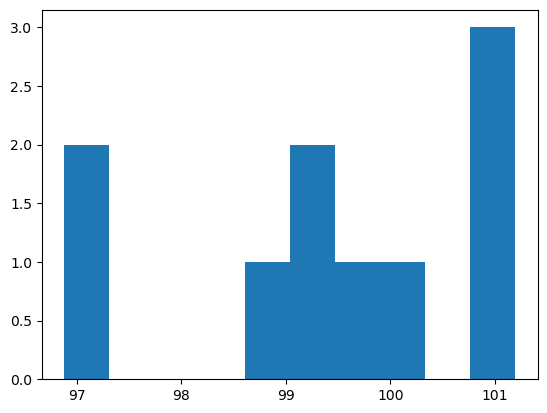

In [110]:
import matplotlib.pyplot as plt

plt.hist(normdist)
plt.show()

### Other Useful Numpy Tools

In [111]:
# trigonometric functions
trig_arr = np.array((0,np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,3*np.pi/2,7*np.pi/4,2*np.pi))
np.round(np.sin(trig_arr),3)

array([ 0.   ,  0.707,  1.   ,  0.707,  0.   , -0.707, -1.   , -0.707,
       -0.   ])

In [112]:
# matrix multiplication
A = np.array([[1,2], [3,4]]) 
B = np.array([[5,6], [7,8]])
C = np.dot(A,B) 
C

array([[19, 22],
       [43, 50]])

In [113]:
# unique values-- similar to set ({})
np.array([1, 2, 3, 2, 1, 3, 4, 4, 5, 5, 5])
B = np.unique(A)
B

array([1, 2, 3, 4])

## Activity

3. Given the two arrays below, create the following matrix
\begin{bmatrix}
1 & 2 & 3 & 4 & 3 & 2 & 1 \\
1 & 2 & 3 & 4 & 3 & 2 & 1 \\
\end{bmatrix}

In [115]:
a = np.array((1,2))
b = np.array((3,4))



#### Answer

In [117]:
# build the first row with hstack((data1, data2,...))
c=np.hstack((a,b,b[0],a[::-1]))

# now vstack((row1, row2))
np.vstack((c,c))


array([[1, 2, 3, 4, 3, 2, 1],
       [1, 2, 3, 4, 3, 2, 1]])

## APPLICATION: Linear Algebra (*not required*)
Numpy has a number of linear algebra functions.  Common examples include finding eigenvalues, eigenvectors, the inverse of a matrix, the determinant, the rank and solving systems of linear equations.  More documentation can be found here: https://numpy.org/doc/stable/reference/routines.linalg.html.  This will not be emphasized in this class, but the Data Science major requires linear algebra, so being aware of this module might be helpful to you both in a linear algebra course and for applications of linear algebra in data science.

In [ ]:
# linear algebra
A = np.array([[1, 2], [4,5]])
inv = np.linalg.inv(A) # returns inverse of matrix
print(inv)
evalsvecs = np.linalg.eig(A) # returns evals and then evecs
print(evalsvecs)
evals = np.linalg.eigvals(A) # returns just evals
print(evals)
det = np.linalg.det(A) # returns determinant
print(det)
rank = np.linalg.matrix_rank(A)
print(rank)

In [ ]:
# solve Ax = b for x
A = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])
x = np.linalg.solve(A, b)
x

## APPLICATION: Image Manipulation As Array Operations (*not required*)

We can open an image from our working directory and display it.  For this demo, we will use the PIL (Python Image Library) module as well as Matplotlib, which is a comprehensive library for creating visualizations in Python.  Later in this class, we will cover Matplotlib in greater detail.  For this demo, we will reuse the same few commands to display a figure, resize a figure, add a plot title, and create subplots.  Further documentation can be found here: https://matplotlib.org.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

img = np.array(Image.open('gus_fat.JPG'))
plt.figure(figsize = (8,8))
plt.imshow(img)
plt.show() 

In [ ]:
# Number of dimensions
img.ndim

In [ ]:
# Shape
img.shape

### Negative of an Image
Each pixel contains three values for the red, green, and blue color. Each value is in the range 0-255.  The values combined make up the resultant color of the pixel.  To negatively transform an image, we subtract the value of the pixel from 255 (maximum possible value of the pixel).

In [ ]:
fig = plt.figure(figsize = (10,10))

fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')

neg_img = 255 - img # transform image
fig.add_subplot(1, 2, 2)
plt.imshow(neg_img)
plt.title('Negative')
plt.show()

### Rotation


In [ ]:
degrees = 90
img_rot = np.rot90(img) # rotate array 90 degree counterclockwise
plt.figure(figsize = (5,5))
plt.imshow(img_rot)
plt.show()

### Grayscale as a Weighted Mean
In digital photography, a grayscale image is one in which the value of each pixel is a single sample representing only an amount of light; that is, it carries only intensity information. Grayscale images, a kind of black-and-white or gray monochrome, are composed exclusively of shades of gray. The contrast ranges from black at the weakest intensity to white at the strongest.
The formula used gives a weight to each color channel: $Y = 0.299R + 0.587G + 0.114B$.

In [ ]:
np.dot(img[:,:, :3] , [0.299 , 0.587, 0.114]).shape

In [ ]:
gray = lambda pic : np.dot(pic[: , :3] , [0.299 , 0.587, 0.114]) 

def make_gray(pic):
    return np.dot(pic[:,:, :3] , [0.299 , 0.587, 0.114]) 

gray = make_gray(img)  
plt.imshow(gray,cmap = plt.get_cmap(name = 'gray'))
plt.show()

### Split into Color Channels

In [ ]:
# function to split on color channels
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True) # sharey = True means y-axis shared among plots
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i]) # iterate along the color dimension
        ax[i].set_title(rgb_list[i], fontsize = 15) # give specific color title
     
rgb_splitter(img) # call function on image

### Array Slicing to Crop an Image


In [ ]:
fig = plt.figure(figsize = (10, 10))

fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Original')

img_crop = img[150:1250, 380:2100, :] # array slicing

fig.add_subplot(1, 2, 2)
plt.imshow(img_crop)
plt.title('Cropped')

plt.show()

### Shadows and Highlights 
These effects (which you can apply using your cell phone editor) have an impact on the intensity of image pixels within specific ranges.
We are using logical indexing and finding pixels with an intensity above a threshold and then amplifying them.

In [ ]:
img_64 = np.where(img > 64, img, 0) * 255
img_128 = np.where(img > 128, img, 0) * 255

img_all = np.concatenate((img, img_64, img_128), axis = 1)
plt.imshow(img_all)
plt.show()

### Blending Images
We can combine images, and give each a weight to determine how much of it comes through.  We will use an image from a local Humboldt beach and combine it with our Gus photo.

In [ ]:
beach_img = np.array(Image.open('sunset.JPG'))
plt.figure(figsize = (8, 8))
plt.imshow(beach_img)
plt.show()

In [ ]:
img_crop = img[:1250, 0:2000, :] # array slicing
beach_crop = beach_img[:1250, 0:2000, :]

# 40% gus and 60% beach
blend = (img_crop * .4 + beach_crop * .6).astype(np.uint8) # convert back to unsigned integer after multiplying by decimals

plt.figure(figsize = (10, 10))
plt.imshow(blend)
plt.show()